# Project 3 - Frequency analysis on floating wind turbine



**Project deadline:** This project is due for submission on Wednesday, 16.06.2022, 23:55. Please check carefully the *About the Projects* section below for further details.
Because of the holidays from 07.06.-10.06., you have three weeks to work on this project. 

**Important:** You have the choice between two projects. This project is a follow up on the lecture on Fourier transforms and how we can use this technique to analyze physical objects and solve such problems. The other project brings the word-game from project2 to a new level. We strongly advise you to read through both project notebooks completely before you take a decision.

**Remark:** This project is stand-alone and you also can work on it if you *did not* work on the Wind turbine in project1. 

**Hand in:** Please continue this notebook and hand this in as .ipynb file at [Projects/Project 3](https://ecampus.uni-bonn.de/goto_ecampus_exc_2645968.html).

## Your name here:
Ajay Shanmuga Sakthivasan

# Floating wind turbines
Currently, the demand for renewable energy is very high. Wind turbines are very successful sources of renewable energy, and many states are planning new wind farms to increase the fraction of green energy in the overall consumption. Despite the high demand, it is difficult to establish large new onshore (land-based) wind farms due to space limitations: Attention has to be paid to landscape and neighbors.

The same constraints do not limit offshore wind farms. However, a conventional offshore wind turbine has a foundation which stands on the seafloor. The foundations are limited to a certain water depth, since the price and complexity of the foundation scales unfavorably with depth. According to Wikipedia, fixed foundations can be installed at water depth up to around 50 m.

This depth constraint limits the possible wind farm locations to a moderate number of areas in the world where the ocean floor falls off relatively flatly away from the shore. 

Therefore, floating foundations are now being developed by many companies.

While floating wind turbine foundations may solve many problems related to installation of offshore wind, the technologies are still being tested. 

In this project you will work with simulated operational data for a floating foundation fitted with a 15 MW wind turbine. At the present time the average size of offshore wind turbines is on the order of 8 MW, but wind turbines in producing in the range of 15-20 MW are being pursued by many of the manufacturing companies. 


### This project
In this project, we will again consider the dataset we used in the last project. 
The data are simulations of a floating 15 MW offshore turbine. The dataset we used in the previous project is for the 50-year event, an extreme storm which occurs very rarely, on time-scales of 50 years. Under such conditions, the rotor blades are turned such that act as aerodynamic they brakes, and the rotor is only turning at a very slow speed.

In the previous project, we studied the time-domain of this dataset,  i.e. the data presented as values as a function of time. We will now study the data in the frequency domain, i.e. the frequency components of this dataset.



The data contains the values shown in this figure as a function of time. 

<img src="figs/windTurbinePicture1.png" width="600" />






## Necessary Python packages

In [1]:
# Here we import the same modules as in the last version of this project.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import pandas as pd
import numpy as np

#to calculate the correlation coefficient
from scipy import stats

filename = "https://raw.githubusercontent.com/terben/Programming_in_Python_BCGS_Summer_2022/master/lecture_08/data/Orcaflex%20Simulation%2C%2015%20MW%20wind%20turbine.csv"

# This one is new, consider what it does. 
units = [pd.read_csv(filename, delimiter = ';', header=2)[key][0] for key in pd.read_csv(filename, delimiter = ';', header=2).keys()]
# pd.DataFrame.keys() returns the 'info axis' (see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.keys.html)
# this is done to extract the corresponding units from the csv file.

# We load and save the data.
data = pd.read_csv(filename, delimiter = ';', header=2, skiprows=[3])

From last time we already The data set contains
* Time in s
* Wind speed in m/s
* Sea surface offset from 'flat water' conditions in m. This is the wave height
* Mooring force in kN. This is the force on the anchor lines  
* Tilt in degrees
* Nacelle acceleration in m/s$^2$. The nacelle is the 'house' on top of the turbine where the rotor is attached
* Tower moment in kN m. This is the torque on from the tower moving with respect to the foundation.  

We make arrays out of the different columns. 

In [2]:
t = np.array(data['Time']) 
seaSurface = np.array(data['Sea surface'])
tilt = np.array(data['Tilt'])
mooring = np.array(data['Mooring force'])
nacAcc = np.array(data['Nac. acc.'])
towerMom = np.array(data['Tower mom.'])
windSpeed = np.array(data['Wind speed'])

In the previous project we considered the behavior of the wind turbine in time-domain. Now we will consider it in frequency domain.

# Your tasks

To solve this project, you should answer the following questions below. 

Remember to choose meaningful x-axes for your plot, as you will that most information is contained at low frequencies. Please also consider when it makes sense to do logarithmic plots.
   
### 1) Fourier transform your variables
Use the numpy real fast fourier transform, np.fft.rfft, on the data, and plot the frequency magnitudes for the different datasets. 

What frequency in the sea surface spectrum has the highest amplitude? What period does this correspond to?

In the previous project we found a strong correlation between the acceleration of the nacelle and the tower moment, following from Newton's 2nd law describing how rotational acceleration translate into a force. Do you also see this in the frequencies?


### 2) Average the Fourier transform
The spectra you plotted in the previous exercise are very noisy.

Write a function which can do an averaged Fourier transform: 
* Snip your time-series into $n$ bits
* Make a Fourier transform of each of the bits
* Mean over the resulting Fourier transforms.

By taking a long time-series, you can get a high frequency resolution. However, the noise level does not change as you measure longer. 
Therefore, by cutting the time series in smaller bits and averaging over the Fourier Transformed signals, we lose frequency resolution, but suppress noise. 

Your function should return the frequencies and the Fourier transform values. 


What happens to the maximal frequency we can measure when we slice the time series into bits?

Test your new function on a 8192-point long signal 
\begin{align}
s(x) = \sum_{f_i} \cos(2\pi f_i x )+\epsilon
\end{align}
for some $x$ with a few frequencies $f_i$ of your choice (start with one frequency component and test it with up to 10 different $f_i$s) and with additional noise $\epsilon$ drawn from a Gaussian distribution around zero. Take a look at the [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)-module to learn how to add Gaussian noise. Observe that you limit noise by averaging.


Does the frequency in the sea surface spectrum with the highest amplitude change much when $n=2,4,8,...$?


We observe two frequency components in the tower moment. One of the frequency components are caused by the turbine eigenfrequency. Which one, and what causes the other one? Compare to the frequency spectra of the other parameters. 

What period does this frequency correspond to?



### 3) Where is the energy?
We have observed that many of the turbine-components oscillate with two frequencies. The energy of a frequency component scales as the square of the frequency amplitude. 

Make a plot which shows the normalized cumulative energy of the mooring - you can use np.cumsum to calculate the cumulative sum. 
Remember to omit the 0th point of the amplitudes. 

What frequency component carries most energy? 


### 4) Creating waves
So far we studied the frequency spectrum of a simulation of a wind turbine subject to a 50-year storm. For such a simulation, the time series for the waves are calculated by taking a known frequency spectrum of waves and transforming these frequencies into sinusoidals which are added together. 

This spectrum is usually drawn from what is called a [JONSWAP-spectrum](https://wikiwaves.org/Ocean-Wave_Spectra). 

In this case, we model the wave-spectrum with a JONSWAP-like spectrum, resulting in a Fourier transform magnitude
\begin{align}
    M(f) = \frac{10^{-7} \,\mbox{Hz}^4 }{f^5}\exp\left(-\frac{3}{4}\left(\frac{f_0}{f}\right)^4\right)\cdot (N+1)/2
\end{align}
where $f$ is the frequency, $f_0$ is the peak frequency, and the constants contain the physical parameter: The wind-speed which gave rise to these waves, the gravitational acceleration, and the drag of the wind on the sea surface. We have already normalized the magnitude by the length of the frequency axis, $N$.

Use your averaging function to plot the frequency spectrum of the actual sea surface. Does this have the same feature as the function $M(f)$? 

Use the inverse fast Fourier transform [np.fft.irfft](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft.html) on $M(f)$ to create a time series and plot it. This should not look nice - what is going on?


To get a realistic wave-pattern, we also need a phase-component. Create an array of the same length as $M(f)$ with phases drawn from an uniform distribution. 
You can calculate the real and imaginary amplitudes of the Fourier transform from the magnitude and angle by
\begin{align}
    RE\,X + i \, IM\,X = M(X)e^{i \phi(X)}.
\end{align}
Calculate the inverse Fourier transform of your new Fourier spectrum, and compare the calculated waves with the actual waves we expect. How does the wave heights compare? 



For real simulations, a number of wave-spectra are generated with different random number generator seeds. Then an appropriate wave series is chosen based on the properties such as highest and lowest waves. 
Generate three different random phase arrays. Use these three to calculate three wave time-series. How different are the maximum and minimum value of the waves?



## Solution

**Important Notes:**  
- No other file except the notebook is included with this submission, as requested in the "About the Projects" section.
- "Loading the data" section has been modified to load the csv file from the git repository on GitHub and therefore, an internet connection is required for this notebook to work. This is done because the necessary csv file for this notebook is not included with this submission. In case of no internet connection or if the git repository is taken down, this notebook will not work. In that case, "Loading the data" section should be modified again to load a local version of the csv file.
- Some images might be broken in this notebook as images are not included with this submission.
- stats from scipy has been imported (in the modules import cell) to be used in a later part of the notebook. Also, a comment has been added in the modules import cell.
- Cells marked \#EXTRA do not add to the solution to the problem, but they do help understanding the solutions better. They also expand on the primary solution and offer additional insights into the problem. I decided to include them with this notebook as they better describe my flow of thoughts while going about solving the problems.

#### Task 1

In [3]:
# calculate the discrete Fourier transform (DFT) of all the variables
# we use fft.rfft function available in the numpy module, since all the functions we have here are real valued
# rfft returns N/2 instead of N DFT components
# this is because the DFT of a real valued function has only N/2 distinct components, the other N/2 being the complex conjugates
seaSurfaceDFT = np.fft.rfft(seaSurface) # sea surface DFT
tiltDFT = np.fft.rfft(tilt) # tilt DFT
mooringDFT = np.fft.rfft(mooring) # mooring DFT
nacAccDFT = np.fft.rfft(nacAcc) # nacelle acceleration DFT
towerMomDFT = np.fft.rfft(towerMom) # tower moment DFT
windSpeedDFT = np.fft.rfft(windSpeed) # wind speed DFT

In [22]:
# calculate the corresponding frequency components using fft.rfftfreq available in the numpy module
DFTfreq = np.fft.rfftfreq(len(t), (t[1]-t[0])) # the second argument is the sample width
# calculate the corresponding frequency components directly using Nyquist-Shannon sampling theorem
DFTfreq2 = np.linspace(0, 1/(t[1]-t[0])/2, int(len(t)/2+1))

# ideally, both these frequency components should be the same
# we check that below -
print('Do frequency components from the above methods differ by more than 1e-3?')
print(np.any(abs(DFTfreq - DFTfreq2) > 1e-3)) # any() to check if any of the elements of the array returns True for the given condition

Do frequency components from the above methods differ by more than 1e3?
False


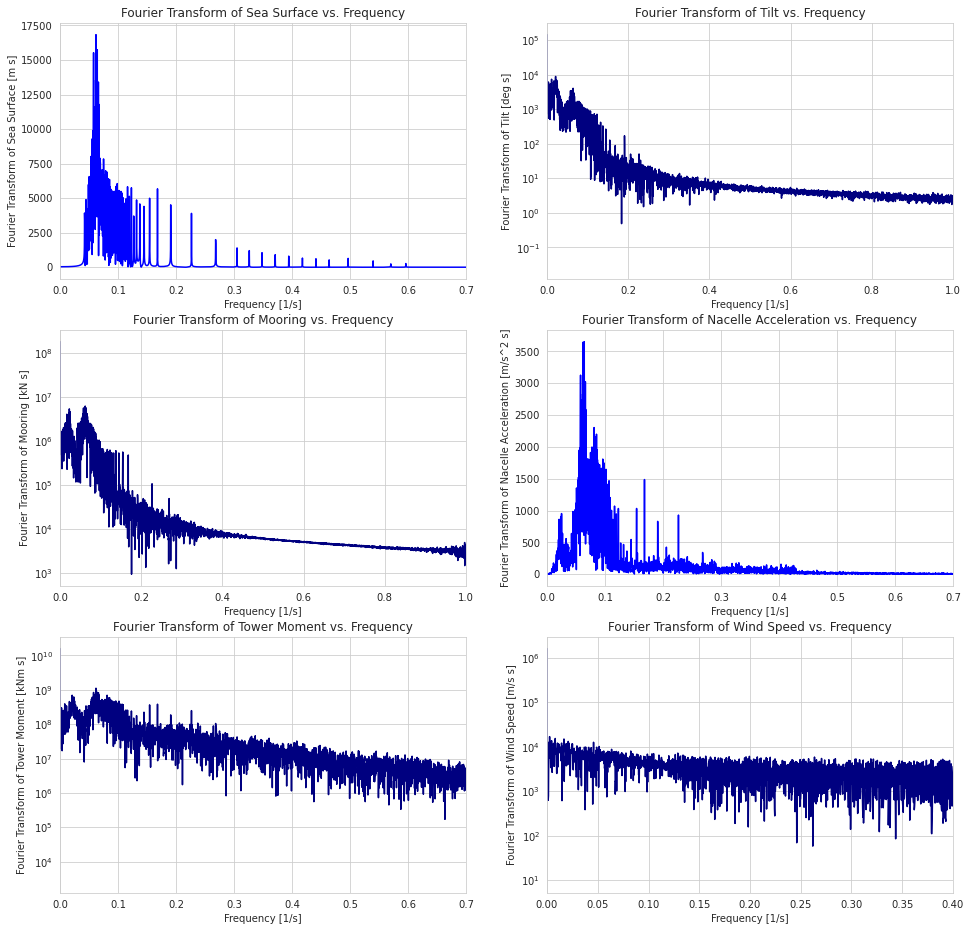

In [52]:
# plot the discrete Fourier transforms in  a 3 row, 2 column layout
# we plot only the absolute values and not the real and imaginary components
fig, ax = plt.subplots(3, 2, figsize = (16, 16))

# plotting sea surface DFT
ax[0, 0].plot(DFTfreq, np.abs(seaSurfaceDFT), color = 'blue')
ax[0, 0].set_title('Fourier Transform of Sea Surface vs. Frequency')
ax[0, 0].set_xlim(0., 0.7)
ax[0, 0].set_xlabel('Frequency [1/s]')
ax[0, 0].set_ylabel('Fourier Transform of Sea Surface [m s]')

# plotting tilt DFT - using log scale here
ax[0, 1].plot(DFTfreq, np.abs(tiltDFT), color = 'navy')
ax[0, 1].set_title('Fourier Transform of Tilt vs. Frequency')
ax[0, 1].set_xlim(0., 1.)
ax[0, 1].set_yscale('log')
ax[0, 1].set_xlabel('Frequency [1/s]')
ax[0, 1].set_ylabel('Fourier Transform of Tilt [deg s]')

# plotting mooring DFT - using log scale here
ax[1, 0].plot(DFTfreq, np.abs(mooringDFT), color = 'navy')
ax[1, 0].set_title('Fourier Transform of Mooring vs. Frequency')
ax[1, 0].set_xlim(0., 1.)
ax[1, 0].set_yscale('log')
ax[1, 0].set_xlabel('Frequency [1/s]')
ax[1, 0].set_ylabel('Fourier Transform of Mooring [kN s]')

# plotting nacelle acceleration DFT
ax[1, 1].plot(DFTfreq, np.abs(nacAccDFT), color = 'blue')
ax[1, 1].set_title('Fourier Transform of Nacelle Acceleration vs. Frequency')
ax[1, 1].set_xlim(0, 0.7)
ax[1, 1].set_xlabel('Frequency [1/s]')
ax[1, 1].set_ylabel('Fourier Transform of Nacelle Acceleration [m/s^2 s]')

#plotting tower moment DFT - using log scale here
ax[2, 0].plot(DFTfreq, np.abs(towerMomDFT), color = 'navy')
ax[2, 0].set_title('Fourier Transform of Tower Moment vs. Frequency')
ax[2, 0].set_xlim(0., 0.7)
ax[2, 0].set_yscale('log')
ax[2, 0].set_xlabel('Frequency [1/s]')
ax[2, 0].set_ylabel('Fourier Transform of Tower Moment [kNm s]')

#plotting wind speed DFT - using log scale here
ax[2, 1].plot(DFTfreq, np.abs(windSpeedDFT), color = 'navy')
ax[2, 1].set_title('Fourier Transform of Wind Speed vs. Frequency')
ax[2, 1].set_xlim(0, 0.4)
ax[2, 1].set_yscale('log')
ax[2, 1].set_xlabel('Frequency [1/s]')
ax[2, 1].set_ylabel('Fourier Transform of Wind Speed [m/s s]')

fig.show()

In [6]:
maxindSSDFT = np.argmax(seaSurfaceDFT) # argument of maximum amplitude of sea surface DFT
maxfreq = DFTfreq[maxindSSDFT] # corresponding frequency
freqdelta = DFTfreq[1] - DFTfreq[0] # frequency resolution - use this to calculate the uncertainty
# the frequency that we report here depends on the frequency resolution, which in turn is determined by Nyquist-Shannon sampling theorem
# the frequency resolution then determines the uncertainty in our result

# print the results
print("Results for Sea Surface Spectrum")
print("**********")
print("Frequency with the highest amplitude:", round(maxfreq, 4), "s^-1") # frequency
print("Uncertainty in Frequency:", round(freqdelta, 4), "s^-1") # uncertainty in frequency - frequency resolution
print("Corresponding Period:", round(1/maxfreq, 2), "sec") # time period
# time period corresponding to the lower and upper end of the time period after accounting for the uncertainty
print("Corresponding Time Period Range:", round(1/(maxfreq + freqdelta), 2), "-", round(1/(maxfreq - freqdelta), 2), "sec")

Results for Sea Surface Spectrum
**********
Frequency with the highest amplitude: 0.0619 s^-1
Uncertainty in Frequency: 0.0003 s^-1
Corresponding Period: 16.14 sec
Corresponding Time Period Range: 16.07 - 16.22 sec


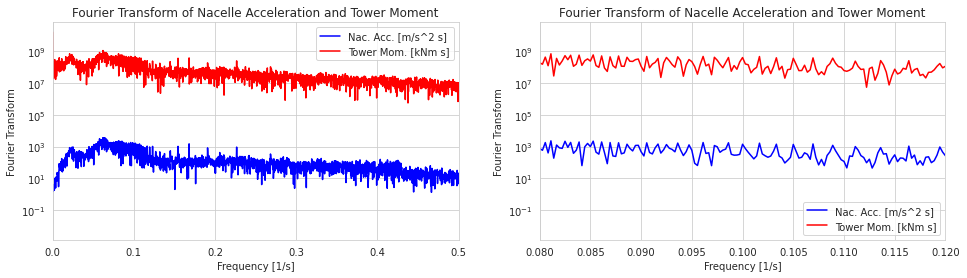

In [53]:
# plot the Fourier transforms of nacelle acceleration and tower moment to see the correlation
fig, ax = plt.subplots(1, 2, figsize = (16, 4))

# primary plot - using log scale here
ax[0].plot(DFTfreq, np.abs(nacAccDFT), color = 'blue', label = 'Nac. Acc. [m/s^2 s]')
ax[0].plot(DFTfreq, np.abs(towerMomDFT), color = 'red', label = 'Tower Mom. [kNm s]')
ax[0].set_title('Fourier Transform of Nacelle Acceleration and Tower Moment')
ax[0].set_xlim(0., 0.5)
ax[0].set_yscale('log')
ax[0].set_xlabel('Frequency [1/s]')
ax[0].set_ylabel('Fourier Transform')
ax[0].legend(loc = 'upper right')

# zoomed in plot (0.08, 0.12) - using log scale here
ax[1].plot(DFTfreq, np.abs(nacAccDFT), color = 'blue', label = 'Nac. Acc. [m/s^2 s]')
ax[1].plot(DFTfreq, np.abs(towerMomDFT), color = 'red', label = 'Tower Mom. [kNm s]')
ax[1].set_title('Fourier Transform of Nacelle Acceleration and Tower Moment')
ax[1].set_xlim(0.08, 0.12)
ax[1].set_yscale('log')
ax[1].set_xlabel('Frequency [1/s]')
ax[1].set_ylabel('Fourier Transform')
ax[1].legend(loc = 'lower right')

fig.show()

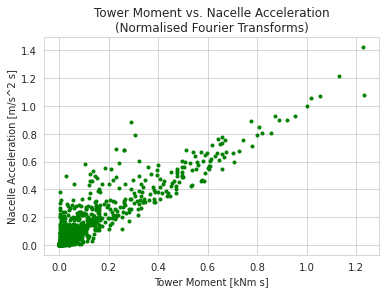

Correlation coefficient: 0.93


In [54]:
# scatter plot to see the correlation between Fourier transforms of nacelle acceleration and tower moment
# we normalise both the Fourier transforms with respect to the maximum value
# we also skip the zeroth component - see discussion
nacAccDFTmax = np.max(nacAccDFT[1:])
towerMomDFTmax = np.max(towerMomDFT[1:])
# create a list of normalised Fourier transform values
nacAccDFTnorm = [i/nacAccDFTmax for i in nacAccDFT[1:]]
towerMomDFTnorm = [i/towerMomDFTmax for i in towerMomDFT[1:]]
# we don't need to convert the above variables to np.array since we won't be using them other than here for plotting

# plot nacelle acceleration vs. tower moment normalised Fourier transforms
plt.plot(np.abs(nacAccDFTnorm), np.abs(towerMomDFTnorm), '.', color = 'green')
plt.title('Tower Moment vs. Nacelle Acceleration\n(Normalised Fourier Transforms)')
plt.xlabel('Tower Moment [kNm s]')
plt.ylabel('Nacelle Acceleration [m/s^2 s]')
plt.show()

# calculate the correlation coefficient using stats.pearsonr
print("Correlation coefficient:", round(stats.pearsonr(np.abs(nacAccDFT)[1:], np.abs(towerMomDFT)[1:])[0], 2))

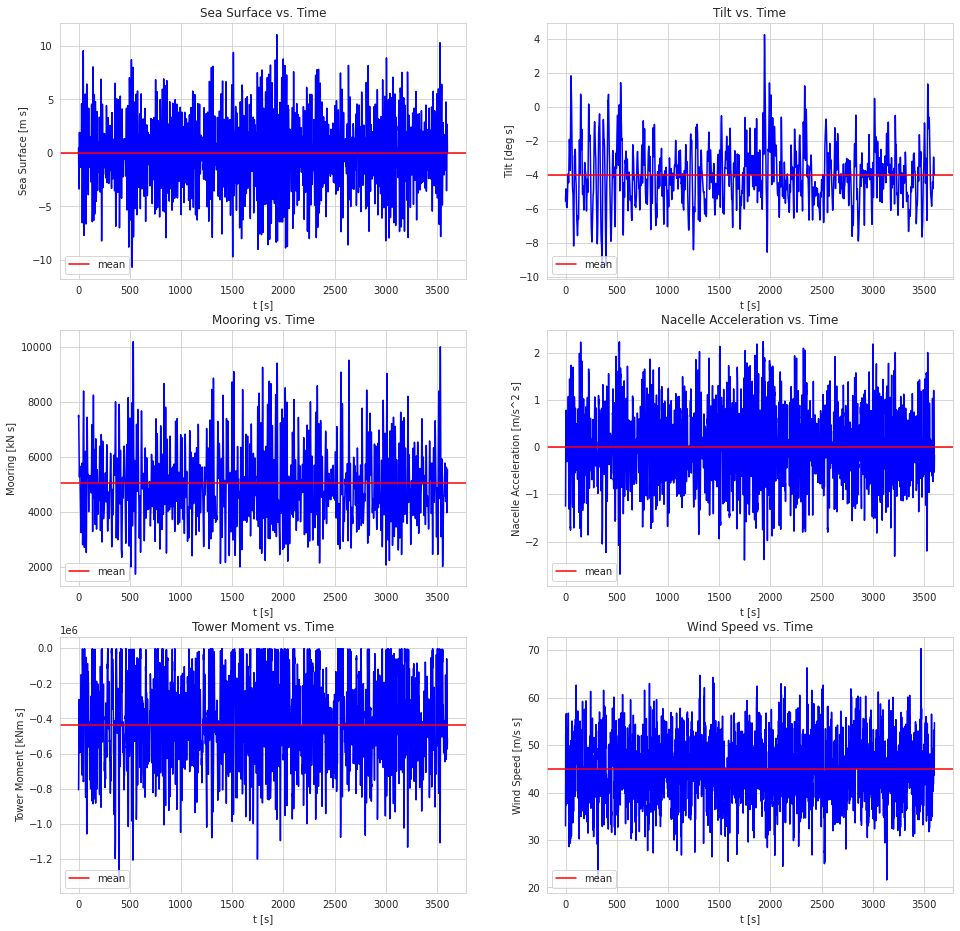

In [55]:
# EXTRA
fig, ax = plt.subplots(3, 2, figsize = (16, 16))

ax[0, 0].plot(t, seaSurface, color = 'blue')
ax[0, 0].axhline(np.mean(seaSurface), color = 'red', label = 'mean')
ax[0, 0].set_title('Sea Surface vs. Time')
ax[0, 0].set_xlabel('t [s]')
ax[0, 0].set_ylabel('Sea Surface [m s]')
ax[0, 0].legend(loc = 'lower left')

ax[0, 1].plot(t, tilt, color = 'blue')
ax[0, 1].axhline(np.mean(tilt), color = 'red', label = 'mean')
ax[0, 1].set_title('Tilt vs. Time')
ax[0, 1].set_xlabel('t [s]')
ax[0, 1].set_ylabel('Tilt [deg s]')
ax[0, 1].legend(loc = 'lower left')

ax[1, 0].plot(t, mooring, color = 'blue')
ax[1, 0].axhline(np.mean(mooring), color = 'red', label = 'mean')
ax[1, 0].set_title('Mooring vs. Time')
ax[1, 0].set_xlabel('t [s]')
ax[1, 0].set_ylabel('Mooring [kN s]')
ax[1, 0].legend(loc = 'lower left')

ax[1, 1].plot(t, nacAcc, color = 'blue')
ax[1, 1].axhline(np.mean(nacAcc), color = 'red', label = 'mean')
ax[1, 1].set_title('Nacelle Acceleration vs. Time')
ax[1, 1].set_xlabel('t [s]')
ax[1, 1].set_ylabel('Nacelle Acceleration [m/s^2 s]')
ax[1, 1].legend(loc = 'lower left')

ax[2, 0].plot(t, towerMom, color = 'blue')
ax[2, 0].axhline(np.mean(towerMom), color = 'red', label = 'mean')
ax[2, 0].set_title('Tower Moment vs. Time')
ax[2, 0].set_xlabel('t [s]')
ax[2, 0].set_ylabel('Tower Moment [kNm s]')
ax[2, 0].legend(loc = 'lower left')

ax[2, 1].plot(t, windSpeed, color = 'blue')
ax[2, 1].axhline(np.mean(windSpeed), color = 'red', label = 'mean')
ax[2, 1].set_title('Wind Speed vs. Time')
ax[2, 1].set_xlabel('t [s]')
ax[2, 1].set_ylabel('Wind Speed [m/s s]')
ax[2, 1].legend(loc = 'lower left')

fig.show()

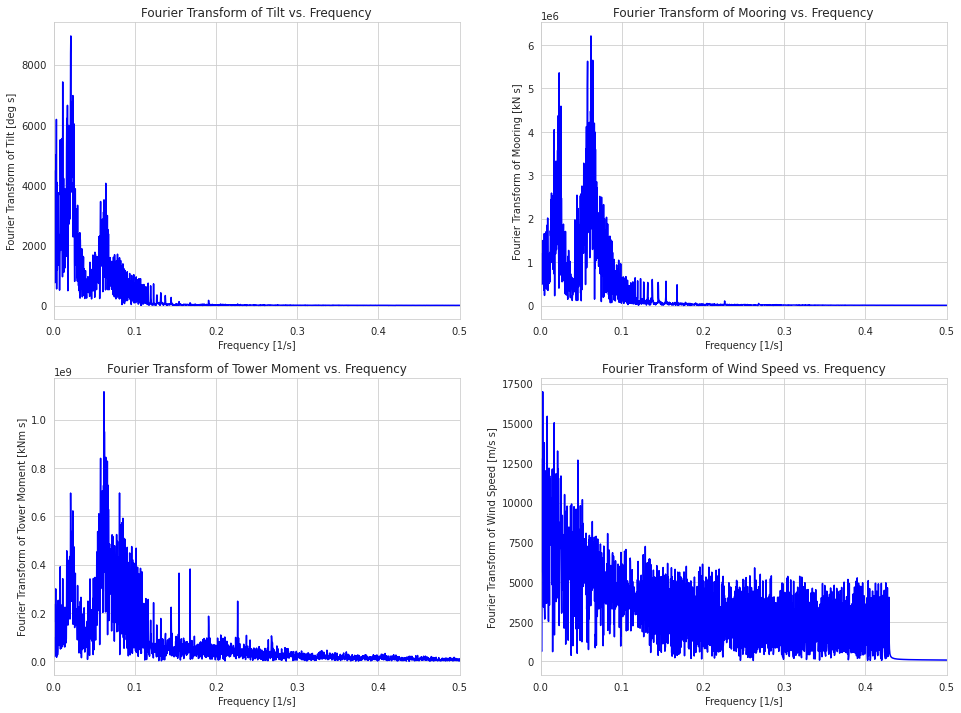

In [56]:
# EXTRA
fig, ax = plt.subplots(2, 2, figsize = (16, 12))

ax[0, 0].plot(DFTfreq[1:], np.abs(tiltDFT[1:]), color = 'blue')
ax[0, 0].set_title('Fourier Transform of Tilt vs. Frequency')
ax[0, 0].set_xlim(0., 0.5)
ax[0, 0].set_xlabel('Frequency [1/s]')
ax[0, 0].set_ylabel('Fourier Transform of Tilt [deg s]')

ax[0, 1].plot(DFTfreq[1:], np.abs(mooringDFT[1:]), color = 'blue')
ax[0, 1].set_title('Fourier Transform of Mooring vs. Frequency')
ax[0, 1].set_xlim(0., 0.5)
ax[0, 1].set_xlabel('Frequency [1/s]')
ax[0, 1].set_ylabel('Fourier Transform of Mooring [kN s]')

ax[1, 0].plot(DFTfreq[1:], np.abs(towerMomDFT[1:]), color = 'blue')
ax[1, 0].set_title('Fourier Transform of Tower Moment vs. Frequency')
ax[1, 0].set_xlim(0., 0.5)
ax[1, 0].set_xlabel('Frequency [1/s]')
ax[1, 0].set_ylabel('Fourier Transform of Tower Moment [kNm s]')

ax[1, 1].plot(DFTfreq[1:], np.abs(windSpeedDFT[1:]), color = 'blue')
ax[1, 1].set_title('Fourier Transform of Wind Speed vs. Frequency')
ax[1, 1].set_xlim(0, 0.5)
ax[1, 1].set_xlabel('Frequency [1/s]')
ax[1, 1].set_ylabel('Fourier Transform of Wind Speed [m/s s]')

fig.show()

#### Task 2

In [11]:
def spectralavgDFT(t, f, n):
    """
    This function takes in three arguments - a time series, some function (of time) and the number of bits to perform spectral average
    and returns the spectral averaged DFT of the function and the corresponding frequency series.
    Specifically, this function returns the real components of the averaged DFT, the imaginary components of the averaged DFT,
    the absolute values of the averaged DFT and the frequency series, in that order.
    Note that higher values of n reduces the resolution of the frequency.
    This function works only with real valued functions, since fft.rfft is used.
    """
    tbit = t[0: n*int(len(t)/n)].reshape(n, int(len(t)/n))
    DFTfreqbit = np.fft.rfftfreq(len(tbit[0]), (tbit[0, 1] - tbit[0, 0]))
    fbit = f[0: n*int(len(f)/n)].reshape(n, int(len(f)/n))
    fDFT = np.fft.rfft(fbit)
    fDFT_real = np.real(fDFT)
    fDFT_imag = np.imag(fDFT)
    fDFT_abs = np.abs(fDFT)
    return np.mean(fDFT_real, axis = 0), np.mean(fDFT_imag, axis = 0), np.mean(fDFT_abs, axis = 0), DFTfreqbit

In [12]:
def testfn(x, freq, noise = 0):
    """
    This function implements the test function given in the problem.
    This function takes in the array of function variable, the array containing test frequencies
    and an optional noise (noise is set to 0 by default).
    This function returns the values of the test function in the given domain.
    """
    s_cos = np.cos(2*np.pi*freq[:, np.newaxis]*x)
    s = np.sum(s_cos, axis = 0) + noise
    return s

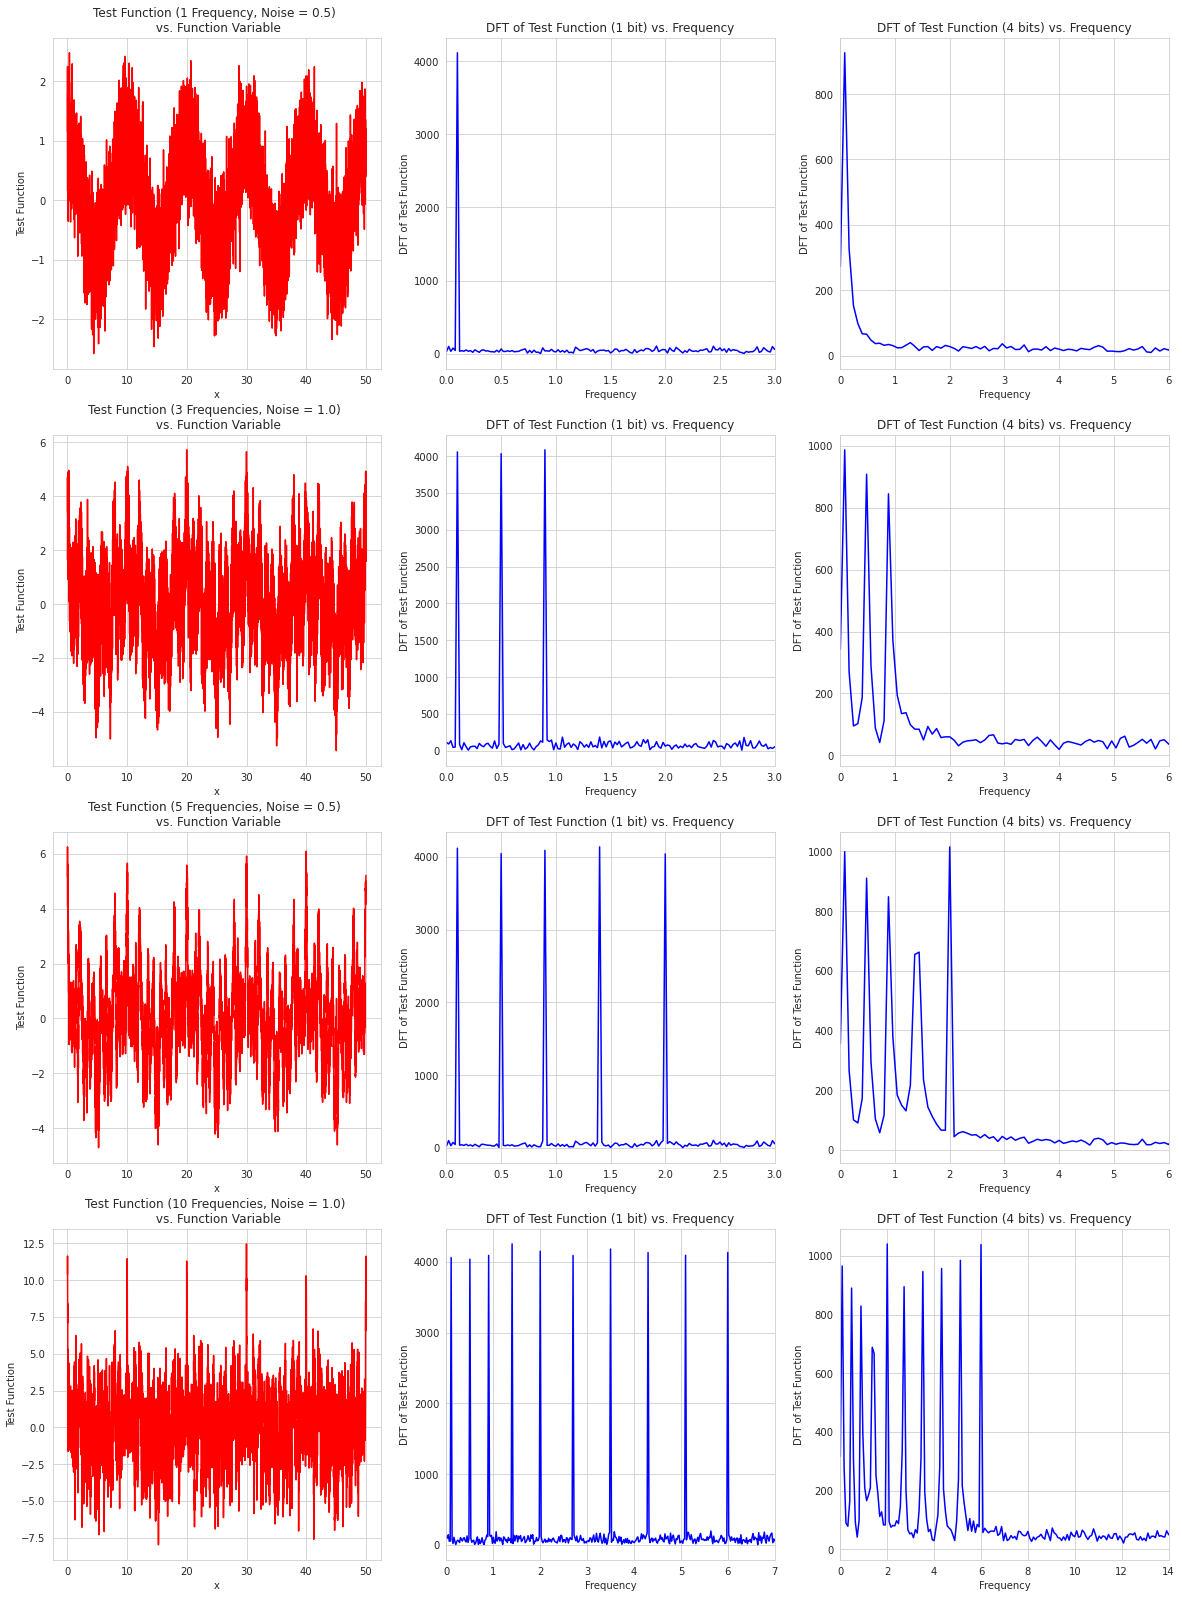

In [13]:
xspace = np.linspace(0, 50, 8192)
testfreq = np.array([0.1, 0.5, 0.9, 1.4, 2., 2.7, 3.5, 4.3, 5.1, 6.])
eps1 = np.random.normal(0, 0.5, 8192)
eps2 = np.random.normal(0, 1., 8192)

fig, ax = plt.subplots(4,3, figsize = (20,28))

sDFT1 = spectralavgDFT(xspace, testfn(xspace, testfreq[:1], eps1), 1)
sDFT2 = spectralavgDFT(xspace, testfn(xspace, testfreq[:1], eps1), 4)
ax[0, 0].plot(xspace, testfn(xspace, testfreq[:1], eps1), color = 'red')
ax[0, 0].set_title('Test Function (1 Frequency, Noise = 0.5) \n vs. Function Variable')
ax[0, 0].set_xlabel('x')
ax[0, 0].set_ylabel('Test Function')
ax[0, 1].plot(sDFT1[3], sDFT1[2], color = 'blue')
ax[0, 1].set_title('DFT of Test Function (1 bit) vs. Frequency')
ax[0, 1].set_xlabel('Frequency')
ax[0, 1].set_ylabel('DFT of Test Function')
ax[0, 1].set_xlim(0, 3)
ax[0, 2].plot(sDFT2[3], sDFT2[2], color = 'blue')
ax[0, 2].set_title('DFT of Test Function (4 bits) vs. Frequency')
ax[0, 2].set_xlabel('Frequency')
ax[0, 2].set_ylabel('DFT of Test Function')
ax[0, 2].set_xlim(0, 6)

sDFT1 = spectralavgDFT(xspace, testfn(xspace, testfreq[:3], eps2), 1)
sDFT2 = spectralavgDFT(xspace, testfn(xspace, testfreq[:3], eps2), 4)
ax[1, 0].plot(xspace, testfn(xspace, testfreq[:3], eps2), color = 'red')
ax[1, 0].set_title('Test Function (3 Frequencies, Noise = 1.0) \n vs. Function Variable')
ax[1, 0].set_xlabel('x')
ax[1, 0].set_ylabel('Test Function')
ax[1, 1].plot(sDFT1[3], sDFT1[2], color = 'blue')
ax[1, 1].set_title('DFT of Test Function (1 bit) vs. Frequency')
ax[1, 1].set_xlabel('Frequency')
ax[1, 1].set_ylabel('DFT of Test Function')
ax[1, 1].set_xlim(0, 3)
ax[1, 2].plot(sDFT2[3], sDFT2[2], color = 'blue')
ax[1, 2].set_title('DFT of Test Function (4 bits) vs. Frequency')
ax[1, 2].set_xlabel('Frequency')
ax[1, 2].set_ylabel('DFT of Test Function')
ax[1, 2].set_xlim(0, 6)

sDFT1 = spectralavgDFT(xspace, testfn(xspace, testfreq[:5], eps1), 1)
sDFT2 = spectralavgDFT(xspace, testfn(xspace, testfreq[:5], eps1), 4)
ax[2, 0].plot(xspace, testfn(xspace, testfreq[:5], eps1), color = 'red')
ax[2, 0].set_title('Test Function (5 Frequencies, Noise = 0.5) \n vs. Function Variable')
ax[2, 0].set_xlabel('x')
ax[2, 0].set_ylabel('Test Function')
ax[2, 1].plot(sDFT1[3], sDFT1[2], color = 'blue')
ax[2, 1].set_title('DFT of Test Function (1 bit) vs. Frequency')
ax[2, 1].set_xlabel('Frequency')
ax[2, 1].set_ylabel('DFT of Test Function')
ax[2, 1].set_xlim(0, 3)
ax[2, 2].plot(sDFT2[3], sDFT2[2], color = 'blue')
ax[2, 2].set_title('DFT of Test Function (4 bits) vs. Frequency')
ax[2, 2].set_xlabel('Frequency')
ax[2, 2].set_ylabel('DFT of Test Function')
ax[2, 2].set_xlim(0, 6)

sDFT1 = spectralavgDFT(xspace, testfn(xspace, testfreq[:10], eps2), 1)
sDFT2 = spectralavgDFT(xspace, testfn(xspace, testfreq[:10], eps2), 4)
ax[3, 0].plot(xspace, testfn(xspace, testfreq[:10], eps2), color = 'red')
ax[3, 0].set_title('Test Function (10 Frequencies, Noise = 1.0) \n vs. Function Variable')
ax[3, 0].set_xlabel('x')
ax[3, 0].set_ylabel('Test Function')
ax[3, 1].plot(sDFT1[3], sDFT1[2], color = 'blue')
ax[3, 1].set_title('DFT of Test Function (1 bit) vs. Frequency')
ax[3, 1].set_xlabel('Frequency')
ax[3, 1].set_ylabel('DFT of Test Function')
ax[3, 1].set_xlim(0, 7)
ax[3, 2].plot(sDFT2[3], sDFT2[2], color = 'blue')
ax[3, 2].set_title('DFT of Test Function (4 bits) vs. Frequency')
ax[3, 2].set_xlabel('Frequency')
ax[3, 2].set_ylabel('DFT of Test Function')
ax[3, 2].set_xlim(0, 14)

fig.show()

In [14]:
seaSurfaceAvgDFT1 = spectralavgDFT(t, seaSurface, 1)
seaSurfaceAvgDFT2 = spectralavgDFT(t, seaSurface, 2)
seaSurfaceAvgDFT4 = spectralavgDFT(t, seaSurface, 4)
seaSurfaceAvgDFT8 = spectralavgDFT(t, seaSurface, 8)
seaSurfaceAvgDFT16 = spectralavgDFT(t, seaSurface, 16)

peakfreq1 = seaSurfaceAvgDFT1[3][np.argmax(seaSurfaceAvgDFT1[2])]
peakfreq2 = seaSurfaceAvgDFT2[3][np.argmax(seaSurfaceAvgDFT2[2])]
peakfreq4 = seaSurfaceAvgDFT4[3][np.argmax(seaSurfaceAvgDFT4[2])]
peakfreq8 = seaSurfaceAvgDFT8[3][np.argmax(seaSurfaceAvgDFT8[2])]
peakfreq16 = seaSurfaceAvgDFT16[3][np.argmax(seaSurfaceAvgDFT16[2])]

print("Frequencies with Highest Amplitude for Sea Surface Spectrum")
print("**********")
print("1 Bit :", round(peakfreq1, 4), "s^-1")
print("2 Bits :", round(peakfreq2, 4), "s^-1")
print("4 Bits :", round(peakfreq4, 4), "s^-1")
print("8 Bits :", round(peakfreq8, 4), "s^-1")
print("16 Bits :", round(peakfreq16, 4), "s^-1")

print("**********")
print("Standard Deviation of the values", round(np.std([peakfreq1, peakfreq2, peakfreq4, peakfreq8, peakfreq16])*100, 3), "%")

Frequencies with Highest Amplitude for Sea Surface Spectrum
**********
1 Bit : 0.0619 s^-1
2 Bits : 0.0617 s^-1
4 Bits : 0.0622 s^-1
8 Bits : 0.0622 s^-1
16 Bits : 0.0622 s^-1
**********
Standard Deviation of the values 0.022 %


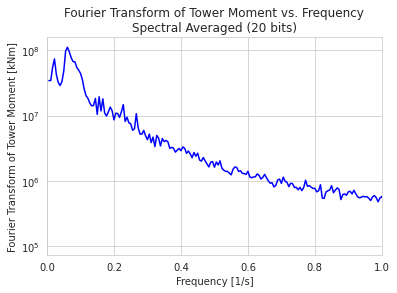

In [15]:
towerMomAvgDFT = spectralavgDFT(t, towerMom, 20)

plt.plot(towerMomAvgDFT[3][1:], towerMomAvgDFT[2][1:], color = 'blue')
plt.title('Fourier Transform of Tower Moment vs. Frequency\nSpectral Averaged (20 bits)')
plt.xlabel('Frequency [1/s]')
plt.ylabel('Fourier Transform of Tower Moment [kNm s]')
plt.xlim(0, 1)
plt.yscale('log')
plt.show()

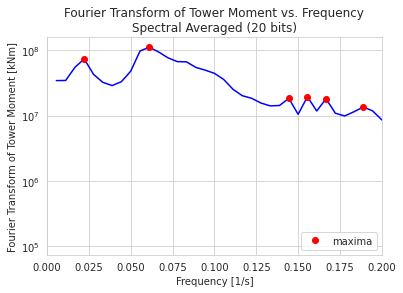

Tower Moment eigenfrequency: 0.022 s^-1
Uncertainty in eigenfrequency: +- 0.006 s^-1
Corresponding Time Period: 45.0 sec
Corresponding Time Period Range: 36.0 - 60.0 sec


In [16]:
towerMomAvgDFT = spectralavgDFT(t, towerMom, 20)

towerMomAvgDFTabsslice = towerMomAvgDFT[2][towerMomAvgDFT[3] < 0.2]
towerMomAvgDFTfreqslice = towerMomAvgDFT[3][towerMomAvgDFT[3] < 0.2]

maxind = np.where((towerMomAvgDFTabsslice[0:-2] <= towerMomAvgDFTabsslice[1:-1]) & (towerMomAvgDFTabsslice[2:] <= towerMomAvgDFTabsslice[1:-1]))[0] + 1

plt.plot(towerMomAvgDFT[3][1:], towerMomAvgDFT[2][1:], color = 'blue')
plt.plot(towerMomAvgDFT[3][maxind], towerMomAvgDFT[2][maxind], 'o', color = 'red', label = 'maxima')
plt.title('Fourier Transform of Tower Moment vs. Frequency\nSpectral Averaged (20 bits)')
plt.xlabel('Frequency [1/s]')
plt.ylabel('Fourier Transform of Tower Moment [kNm s]')
plt.xlim(0, 0.2)
plt.yscale('log')
plt.legend(loc = 'lower right')
plt.show()

eigenfreq = towerMomAvgDFT[3][maxind[0]]
freqdelta = towerMomAvgDFT[3][1] - towerMomAvgDFT[3][0]
print("Tower Moment eigenfrequency:", round(eigenfreq, 3), "s^-1")
print("Uncertainty in eigenfrequency: +-", round(freqdelta, 3), "s^-1")
print("Corresponding Time Period:", round(1/eigenfreq, 2), "sec")
print("Corresponding Time Period Range:", round(1/(eigenfreq + freqdelta), 2), "-", round(1/(eigenfreq - freqdelta), 2), "sec")

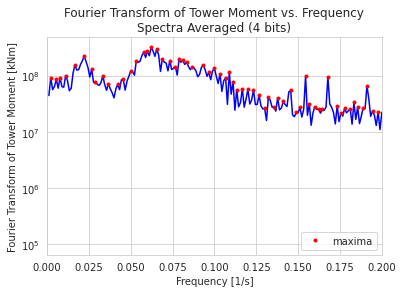

Tower Moment eigenfrequency: 0.022 s^-1
Uncertainty in eigenfrequency: +- 0.001 s^-1
Corresponding Time Period: 45.0 sec
Corresponding Time Period Range: 42.86 - 47.37 sec


In [17]:
towerMomAvgDFT = spectralavgDFT(t, towerMom, 4)

towerMomAvgDFTabsslice = towerMomAvgDFT[2][towerMomAvgDFT[3] < 0.2]
towerMomAvgDFTfreqslice = towerMomAvgDFT[3][towerMomAvgDFT[3] < 0.2]

maxind = np.where((towerMomAvgDFTabsslice[0:-2] <= towerMomAvgDFTabsslice[1:-1]) & (towerMomAvgDFTabsslice[2:] <= towerMomAvgDFTabsslice[1:-1]))[0] + 1

plt.plot(towerMomAvgDFT[3][1:], towerMomAvgDFT[2][1:], color = 'blue')
plt.plot(towerMomAvgDFT[3][maxind], towerMomAvgDFT[2][maxind], '.', color = 'red', label = 'maxima')
plt.title('Fourier Transform of Tower Moment vs. Frequency\nSpectra Averaged (4 bits)')
plt.xlabel('Frequency [1/s]')
plt.ylabel('Fourier Transform of Tower Moment [kNm s]')
plt.xlim(0, 0.2)
plt.yscale('log')
plt.legend(loc = 'lower right')
plt.show()

eigenfreq = towerMomAvgDFT[3][maxind[5]]
freqdelta = towerMomAvgDFT[3][1] - towerMomAvgDFT[3][0]
print("Tower Moment eigenfrequency:", round(eigenfreq, 3), "s^-1")
print("Uncertainty in eigenfrequency: +-", round(freqdelta, 3), "s^-1")
print("Corresponding Time Period:", round(1/eigenfreq, 2), "sec")
print("Corresponding Time Period Range:", round(1/(eigenfreq + freqdelta), 2), "-", round(1/(eigenfreq - freqdelta), 2), "sec")

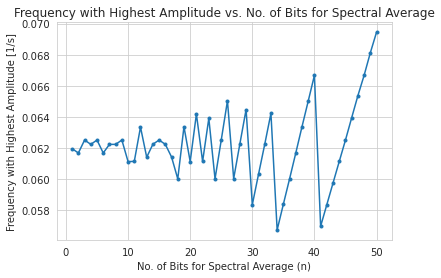

In [18]:
# EXTRA
n = np.linspace(1, 50, 50)
peakfreqarray = np.zeros(len(n))

for i in n:
    seaSurfaceAvgDFTextra  = spectralavgDFT(t, seaSurface, int(i))
    peakfreqarray[int(i) - 1] = (seaSurfaceAvgDFTextra[3][np.argmax(seaSurfaceAvgDFTextra[2])])

plt.plot(n, peakfreqarray, '.-')
plt.title('Frequency with Highest Amplitude vs. No. of Bits for Spectral Average')
plt.xlabel('No. of Bits for Spectral Average (n)')
plt.ylabel('Frequency with Highest Amplitude [1/s]')
plt.show()

#### Task 3

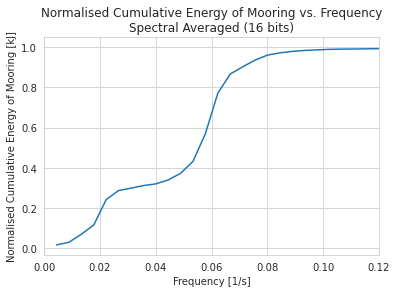

In [19]:
mooringAvgDFT = spectralavgDFT(t, mooring, 16)
mooringcumsum = np.cumsum(mooringAvgDFT[2][1:]**2)
mooringsum = np.sum(mooringAvgDFT[2][1:]**2)
mooringcumsum = mooringcumsum/mooringsum

plt.plot(mooringAvgDFT[3][1:], mooringcumsum)
plt.title('Normalised Cumulative Energy of Mooring vs. Frequency\nSpectral Averaged (16 bits)')
plt.xlabel('Frequency [1/s]')
plt.ylabel('Normalised Cumulative Energy of Mooring [kJ]')
plt.xlim(0, 0.12)
plt.show()

#### Task 4

In [38]:
def M(f,f0):
    """
    This function takes in the frequency series and the peak frequency
    and returns the JONSWAP-like spectrum to model Sea Surface
    """
    func = (2.2*10**(-6)/(f**5))*np.exp(-(5/4)*(f0/f)**4)*(len(f)+1)/2
    return func

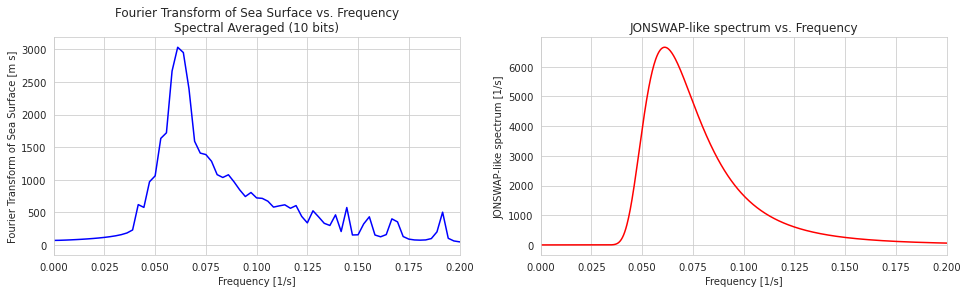

In [67]:
seaSurfaceAvgDFT = spectralavgDFT(t, seaSurface, 10)
peakfreq = seaSurfaceAvgDFT[3][np.argmax(seaSurfaceAvgDFT[2])]

fig, ax = plt.subplots(1, 2, figsize = (16, 4))

ax[0].plot(seaSurfaceAvgDFT[3], seaSurfaceAvgDFT[2], color = 'blue')
ax[0].set_title('Fourier Transform of Sea Surface vs. Frequency\nSpectral Averaged (10 bits)')
ax[0].set_xlabel('Frequency [1/s]')
ax[0].set_ylabel('Fourier Transform of Sea Surface [m s]')
ax[0].set_xlim(0, 0.2)

ax[1].plot(DFTfreq[1:], M(DFTfreq[1:], peakfreq), color = 'red')
ax[1].set_title('JONSWAP-like spectrum vs. Frequency')
ax[1].set_xlabel('Frequency [1/s]')
ax[1].set_ylabel('JONSWAP-like spectrum [1/s]')
ax[1].set_xlim(0,0.2)

fig.show()

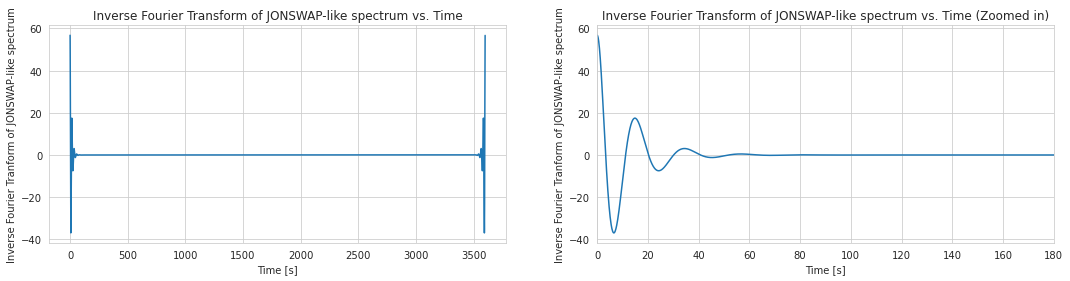

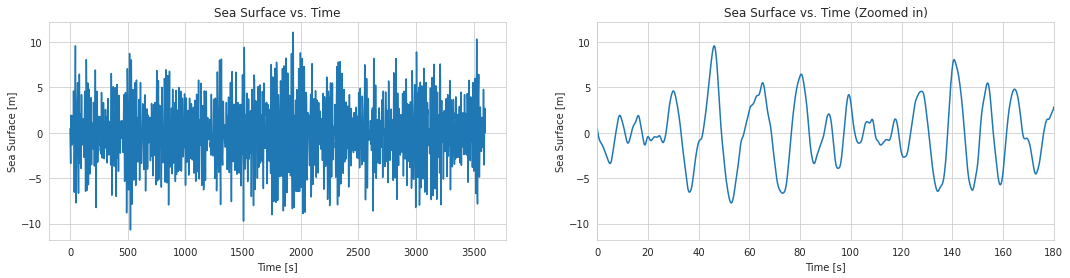

In [103]:
MinvDFT = np.fft.irfft(M(DFTfreq[1:], peakfreq))

fig, ax = plt.subplots(1, 2, figsize = (18, 4))

ax[0].plot(t[:len(MinvDFT)], MinvDFT)
ax[0].set_title('Inverse Fourier Transform of JONSWAP-like spectrum vs. Time')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Inverse Fourier Tranform of JONSWAP-like spectrum')

ax[1].plot(t[:len(MinvDFT)], MinvDFT)
ax[1].set_title('Inverse Fourier Transform of JONSWAP-like spectrum vs. Time (Zoomed in)')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Inverse Fourier Tranform of JONSWAP-like spectrum')
ax[1].set_xlim(0, 180)

fig.show()

fig, ax = plt.subplots(1, 2, figsize = (18, 4))

ax[0].plot(t, seaSurface)
ax[0].set_title('Sea Surface vs. Time')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Sea Surface [m]')

ax[1].plot(t, seaSurface)
ax[1].set_title('Sea Surface vs. Time (Zoomed in)')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Sea Surface [m]')
ax[1].set_xlim(0, 180)

fig.show()

Observations vs. Simulations
**********
Observed maximum height: 11.05 m
Observed minimum height: -10.69 m
Maximum height from simulations: 8.79 m
Minimum height from simulations: -9.14 m
Difference in maximum heights: 2.26 m
Difference in minimum heights: 1.55 m
**********


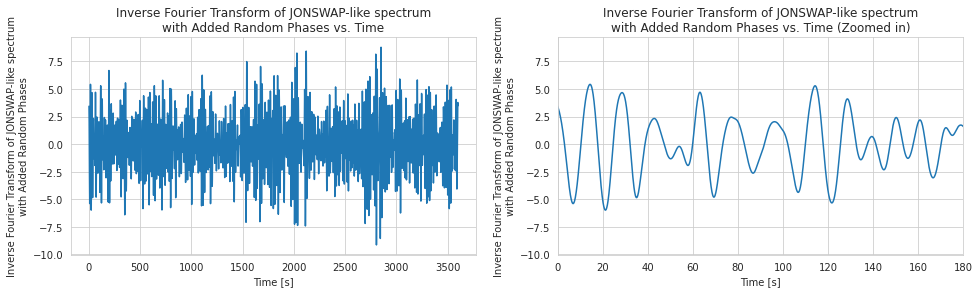

In [124]:
phi = np.random.uniform(0,2*np.pi, len(M(DFTfreq[1:], peakfreq)))
Mprime = M(DFTfreq[1:], peakfreq) * np.exp(1j*phi)
MprimeinvDFT = np.fft.irfft(Mprime)

fig, ax = plt.subplots(1, 2, figsize = (16, 4))

ax[0].plot(t[:len(MprimeinvDFT)], MprimeinvDFT)
ax[0].set_title('Inverse Fourier Transform of JONSWAP-like spectrum\nwith Added Random Phases vs. Time')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Inverse Fourier Transform of JONSWAP-like spectrum\nwith Added Random Phases')

ax[1].plot(t[:len(MprimeinvDFT)], MprimeinvDFT)
ax[1].set_title('Inverse Fourier Transform of JONSWAP-like spectrum\nwith Added Random Phases vs. Time (Zoomed in)')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Inverse Fourier Transform of JONSWAP-like spectrum\nwith Added Random Phases')
ax[1].set_xlim(0, 180)

fig.show()

print("Observations vs. Simulations")
print("**********")
print("Observed maximum height:", np.max(seaSurface), "m")
print("Observed minimum height:", np.min(seaSurface), "m")
print("Maximum height from simulations:", round(np.max(MprimeinvDFT), 2), "m")
print("Minimum height from simulations:", round(np.min(MprimeinvDFT), 2), "m")
print("Difference in maximum heights:", round(abs(np.max(seaSurface) - np.max(MprimeinvDFT)), 2), "m")
print("Difference in minimum heights:", round(abs(np.min(seaSurface) - np.min(MprimeinvDFT)), 2), "m")
print("**********")

Observations vs. Simulations
**********
Difference in maximum heights (Seed 1): 2.74 m
Difference in minimum heights (Seed 1): 2.35 m
Difference in maximum heights (Seed 2): 3.52 m
Difference in minimum heights (Seed 2): 2.08 m
Difference in maximum heights (Seed 3): 0.76 m
Difference in minimum heights (Seed 3): 0.38 m
**********


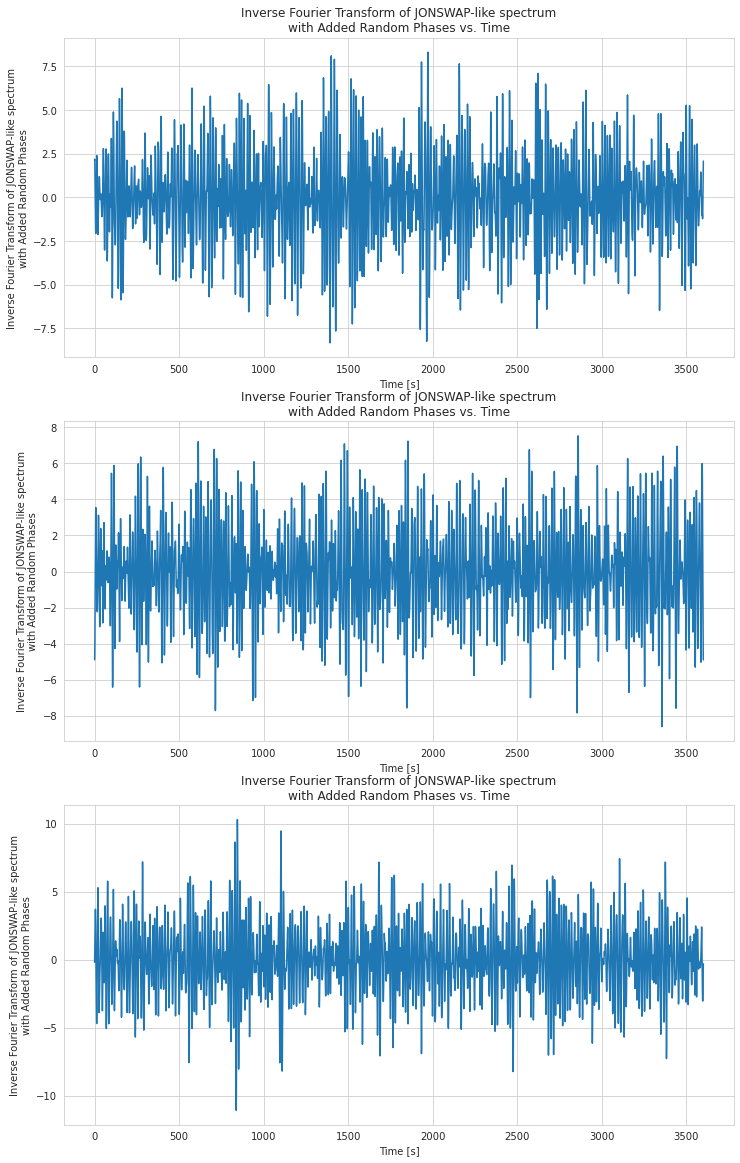

In [126]:
np.random.seed(10)
phi1 = np.random.uniform(0,2*np.pi, len(M(DFTfreq[1:], peakfreq)))
Mprime1 = M(DFTfreq[1:], peakfreq) * np.exp(1j*phi1)
MprimeinvDFT1 = np.fft.irfft(Mprime1)
np.random.seed(25)
phi2 = np.random.uniform(0,2*np.pi, len(M(DFTfreq[1:], peakfreq)))
Mprime2 = M(DFTfreq[1:], peakfreq) * np.exp(1j*phi2)
MprimeinvDFT2 = np.fft.irfft(Mprime2)
np.random.seed(45)
phi3 = np.random.uniform(0,2*np.pi, len(M(DFTfreq[1:], peakfreq)))
Mprime3 = M(DFTfreq[1:], peakfreq) * np.exp(1j*phi3)
MprimeinvDFT3 = np.fft.irfft(Mprime3)

fig, ax = plt.subplots(3, 1, figsize = (12, 20))

ax[0].plot(t[:len(MprimeinvDFT1)], MprimeinvDFT1)
ax[0].set_title('Inverse Fourier Transform of JONSWAP-like spectrum\nwith Added Random Phases vs. Time')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Inverse Fourier Transform of JONSWAP-like spectrum\nwith Added Random Phases')

ax[1].plot(t[:len(MprimeinvDFT2)], MprimeinvDFT2)
ax[1].set_title('Inverse Fourier Transform of JONSWAP-like spectrum\nwith Added Random Phases vs. Time')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Inverse Fourier Transform of JONSWAP-like spectrum\nwith Added Random Phases')

ax[2].plot(t[:len(MprimeinvDFT3)], MprimeinvDFT3)
ax[2].set_title('Inverse Fourier Transform of JONSWAP-like spectrum\nwith Added Random Phases vs. Time')
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel('Inverse Fourier Transform of JONSWAP-like spectrum\nwith Added Random Phases')

fig.show()

print("Observations vs. Simulations")
print("**********")
print("Difference in maximum heights (Seed 1):", round(abs(np.max(seaSurface) - np.max(MprimeinvDFT1)), 2), "m")
print("Difference in minimum heights (Seed 1):", round(abs(np.min(seaSurface) - np.min(MprimeinvDFT1)), 2), "m")
print("Difference in maximum heights (Seed 2):", round(abs(np.max(seaSurface) - np.max(MprimeinvDFT2)), 2), "m")
print("Difference in minimum heights (Seed 2):", round(abs(np.min(seaSurface) - np.min(MprimeinvDFT2)), 2), "m")
print("Difference in maximum heights (Seed 3):", round(abs(np.max(seaSurface) - np.max(MprimeinvDFT3)), 2), "m")
print("Difference in minimum heights (Seed 3):", round(abs(np.min(seaSurface) - np.min(MprimeinvDFT3)), 2), "m")
print("**********")

**More considerations**

These questions are 'bonus questions'. You should not feel obliged to do them at all, and you can also obtain bonus points via good discussion of the previous points.

If we plot the frequency components of the storm wind-speed, we observe that above a certain threshold no more frequencies appear. This is an artefact of the simulations - but it is also a physically valid assumption that we can ignore the high frequency components of the wind speed. Why?

In task 2 we asked you to mean over the signal in frequency domain. Would it make sense to mean in time-domain and Fourier transform this mean?

Could we also mean in a different way?